In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [10]:
life_df = pd.read_csv ("life_expectancy_data.csv")
life_df.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,GDP,Life expectancy class
0,Afghanistan,2015,Developing,65.0,263.0,62,584.259210,Low
1,Albania,2015,Developing,77.8,74.0,0,3954.227830,High
2,Algeria,2015,Developing,75.6,19.0,21,4132.762920,Medium
3,Angola,2015,Developing,52.4,335.0,66,3695.793748,Low
4,Antigua and Barbuda,2015,Developing,76.4,13.0,0,13566.954100,High


## Data Cleaning

In [6]:
#Data was Cleaned prior to the project
print(life_df["Life expectancy"])

0      65.0
1      77.8
2      75.6
3      52.4
4      76.4
       ... 
178    74.1
179    76.0
180    65.7
181    61.8
182    67.0
Name: Life expectancy, Length: 183, dtype: float64


In [7]:
life_expectancy_list = life_df["Life expectancy"].tolist()
life_expectancy_list

[65.0,
 77.8,
 75.6,
 52.4,
 76.4,
 76.3,
 74.8,
 82.8,
 81.5,
 72.7,
 76.1,
 76.9,
 71.8,
 75.5,
 72.3,
 81.1,
 71.0,
 60.0,
 69.8,
 77.0,
 77.4,
 65.7,
 75.0,
 77.7,
 74.5,
 59.9,
 59.6,
 53.3,
 73.3,
 68.7,
 57.3,
 82.2,
 52.5,
 53.1,
 85.0,
 76.1,
 74.8,
 63.5,
 64.7,
 79.6,
 78.0,
 79.1,
 85.0,
 78.8,
 76.0,
 59.8,
 86.0,
 63.5,
 73.9,
 76.2,
 79.0,
 73.5,
 58.2,
 64.7,
 77.6,
 64.8,
 69.9,
 81.1,
 82.4,
 66.0,
 61.1,
 74.4,
 81.0,
 62.4,
 81.0,
 73.6,
 71.9,
 59.0,
 58.9,
 66.2,
 63.5,
 74.6,
 75.8,
 82.7,
 68.3,
 69.1,
 75.5,
 68.9,
 81.4,
 82.5,
 82.7,
 76.2,
 83.7,
 74.1,
 72.0,
 63.4,
 66.3,
 74.7,
 71.1,
 65.7,
 74.6,
 74.9,
 53.7,
 61.4,
 72.7,
 73.6,
 82.0,
 65.5,
 58.3,
 75.0,
 78.5,
 58.2,
 81.7,
 63.1,
 74.6,
 76.7,
 69.4,
 68.8,
 76.1,
 74.3,
 57.6,
 66.6,
 65.8,
 69.2,
 81.9,
 81.6,
 74.8,
 61.8,
 54.5,
 81.8,
 76.6,
 66.4,
 77.8,
 62.9,
 74.0,
 75.5,
 68.5,
 77.5,
 81.1,
 78.2,
 82.3,
 72.1,
 75.0,
 75.0,
 66.1,
 75.2,
 73.2,
 74.0,
 67.5,
 74.5,
 66.7,
 75.6,
 73.2,

# 3. Exploratory Data Analysis

## 3a. scatter plots

<Axes: xlabel='Life expectancy', ylabel='Count'>

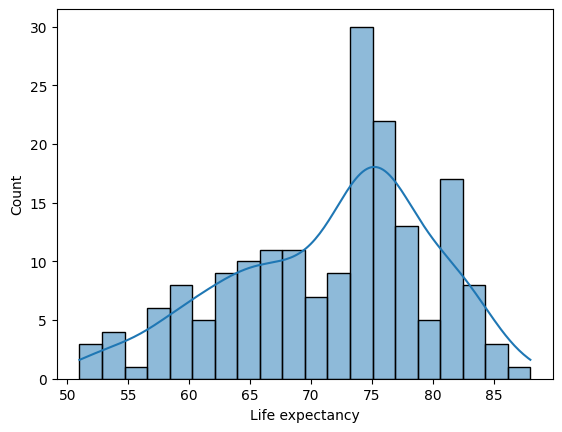

In [4]:
sns.histplot(life_df["Life expectancy"], bins = 20, kde = True)

In [ ]:
#The histogram is unimodal and positively skewed and the distribution shows that there are some relatively high values of high life expectancy

<Axes: xlabel='GDP', ylabel='Life expectancy'>

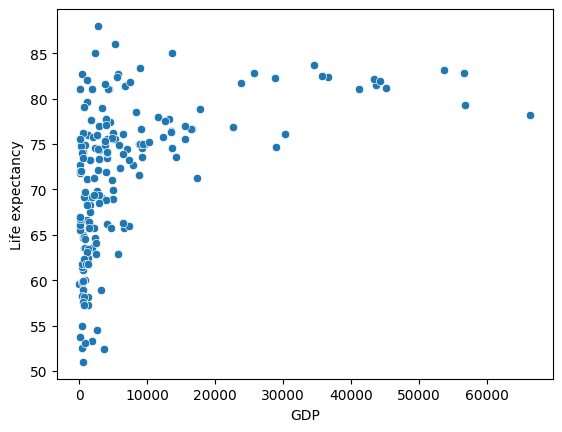

In [8]:
sns.scatterplot(data = life_df, x = "GDP", y = "Life expectancy")

<Axes: xlabel='Adult Mortality', ylabel='Life expectancy'>

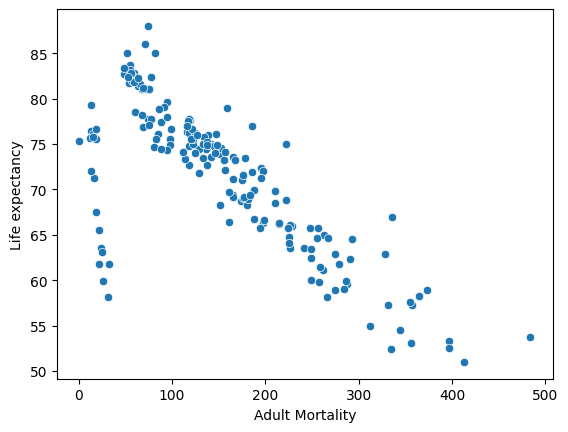

In [13]:
sns.scatterplot(data = life_df, x = "Adult Mortality", y = "Life expectancy")

<Axes: xlabel='infant deaths', ylabel='Life expectancy'>

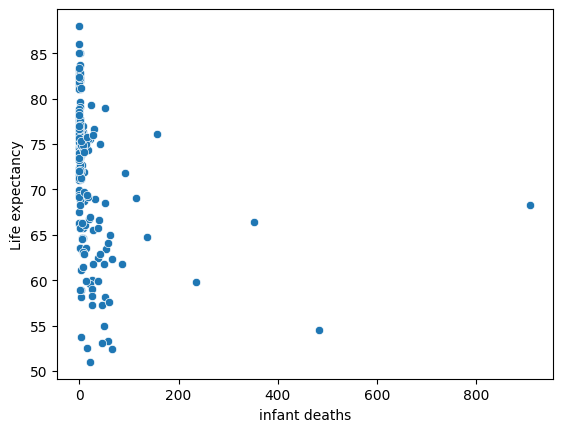

In [15]:
sns.scatterplot(data = life_df, x = "infant deaths", y = "Life expectancy")

## 3b. Correlation

In [17]:
life_df["Life expectancy"].corr(life_df["GDP"])

0.46887358859484596

In [18]:
life_df["Life expectancy"].corr(life_df["Adult Mortality"])

-0.7791194739614955

In [19]:
life_df["Life expectancy"].corr(life_df["infant deaths"])

-0.24128954467113733

<Axes: >

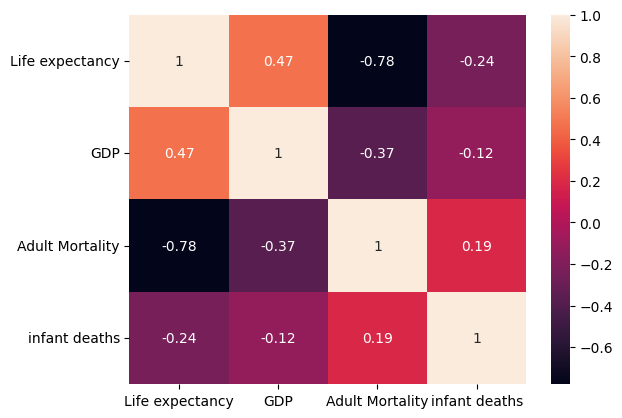

In [21]:
column_list = ["Life expectancy", "GDP", "Adult Mortality",
"infant deaths"]
sns.heatmap(life_df[column_list].corr(), annot = True)

In [ ]:
#The plots and correlation shows a very strong negative relationship between Adult Mortality and Life Expectancy

<Axes: xlabel='Status', ylabel='Life expectancy'>

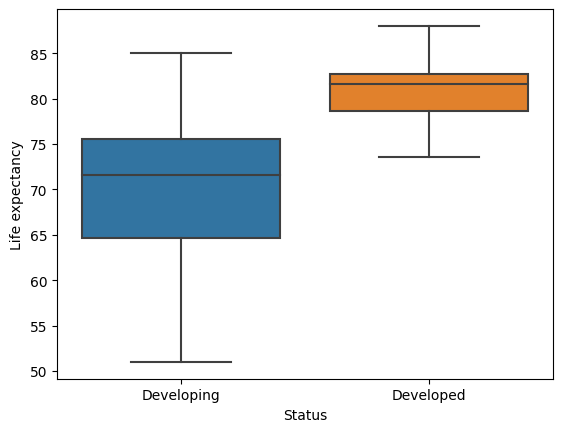

In [22]:
sns.boxplot(data = life_df, x = 'Status', y = "Life expectancy")

## Feature selection

In [ ]:
##The plots in the previous section shows that the higher the GDP of a country the higher the life expectantancy

In [27]:
x = life_df ["GDP"]
y = life_df ["Life expectancy"]

In [28]:
x = x.to_numpy().reshape(-1,1)

## Model Development (Regression)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
#Split Data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [32]:
#Standardize Data (mean = 0 and SD = -1)
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(x) #Fit this to the data in x (using the whole dataset). This allows it to determine the mean and  standard deviation of the data:
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)

In [33]:
#Linear Regression
from sklearn.linear_model import LinearRegression

life_linear = LinearRegression()
life_linear.fit(x_train_scaled, y_train)

LinearRegression()

In [36]:
#Gradient and Intercept
gradient = life_linear.coef_[0]
intercept = life_linear.intercept_
print("gradient: ", gradient) 
print("intercept: ", intercept)

gradient:  3.736673077166571
intercept:  71.8160790718866


In [37]:
#Model prediction
life_pred = life_linear.predict(x_test_scaled)

In [38]:
life_pred

array([70.41448951, 70.22679186, 70.46318367, 69.8604739 , 70.08631858,
       70.84173639, 71.659879  , 69.67500038, 69.60118751, 69.60232329,
       69.50277847, 70.99785701, 70.77341255, 69.7780604 , 69.63935547,
       70.99475321, 70.77044228, 69.75950806, 80.18717886, 71.01706354,
       69.66080923, 69.61992056, 74.57563743, 69.87593874, 69.50695396,
       69.50944551, 69.67969471, 70.30080893, 69.725224  , 69.72058175,
       70.52500875, 69.69007858, 71.80316683, 70.3368718 , 70.70728208,
       69.85072992, 87.10252344])

In [39]:
#Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import numpy as np
mae = mean_absolute_error(y_test, life_pred)
mse = mean_squared_error(y_test, life_pred)
rmse = np.sqrt(mse)
R2 = r2_score(y_test, life_pred)

In [40]:
print(mae, mse,rmse,R2)

6.189693012844059 58.34352663502324 7.638293437347326 0.15096662913593706


In [41]:
x_fit = np.arange(0, 70000, 1).reshape(-1,1)
x_fit_scaled = scale.transform(x_fit)
y_fit = life_linear.predict(x_fit_scaled)

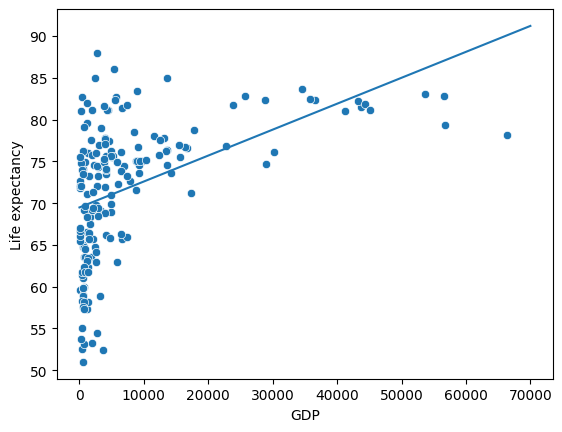

In [42]:
sns.scatterplot(data = life_df, x ="GDP", y = "Life expectancy")
plt.plot(x_fit, y_fit)

## Additional Regression Models with a Single Input Feature

In [47]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2, include_bias = False)
x_poly = poly.fit_transform(x_train_scaled)
x_test_poly = poly.transform(x_test_scaled)

In [44]:
life_poly = LinearRegression() 
life_poly.fit(x_poly, y_train)


LinearRegression()

In [45]:
print("intercept: ", life_poly.intercept_)
print("coefficients: ", life_poly.coef_)


intercept:  73.16765408941205
coefficients:  [ 7.75381529 -1.49220112]


In [50]:
mae = mean_absolute_error(y_test, life_pred2)
mse = mean_squared_error(y_test, life_pred2)
rmse = np.sqrt(mse)
R2 = r2_score(y_test, life_pred2)

print (mae,mse,rmse,R2)

5.512620340546638 50.90032575507902 7.134446422468881 0.25928243206382906


In [48]:
life_pred2 = life_poly.predict(x_test_poly)

## Multiple Linear Regression

In [56]:
feature_names = ["GDP", "Adult Mortality", "infant deaths"]
xm = life_df[feature_names]  # Features
ym = life_df["Life expectancy"]  # Target variable

xm_train, xm_test, ym_train, ym_test = train_test_split(xm, ym, test_size=0.2, random_state=42)

scaler = StandardScaler()
xm_train_scaled = scaler.fit_transform(xm_train)
xm_test_scaled = scaler.transform(xm_test)

In [58]:
life_multi = LinearRegression()
life_multi.fit(xm_train_scaled, ym_train)

# Make predictions on the test data
ym_pred = life_multi.predict(xm_test_scaled)

# Calculate evaluation metrics
mae = mean_absolute_error(ym_test, ym_pred)
mse = mean_squared_error(ym_test, ym_pred)
rmse = np.sqrt(mse)
r2 = r2_score(ym_test, ym_pred)

# Print the results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 3.5653880708491372
Mean Squared Error (MSE): 26.20791809861847
Root Mean Squared Error (RMSE): 5.119366962683811
R-squared (R2): 0.6186141234520102


## Model Development (Classification)

<Axes: xlabel='Life expectancy class', ylabel='count'>

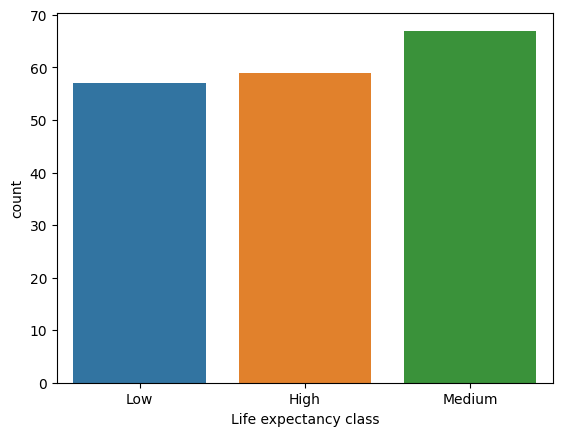

In [59]:
sns.countplot(data = life_df, x = "Life expectancy class")

In [65]:
feature_names = ["GDP", "Adult Mortality", "infant deaths"]
x = life_df[feature_names]
y = life_df["Life expectancy class"]

In [68]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42, k_neighbors = 2) #use to balance/ oversample the class minority
x_res, y_res = sm.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x_res,y_res, test_size = 0.2, random_state = 42)

In [67]:
#scaler = StandardScaler()
#x_train_scaled = scaler.fit_transform(x_train)
#x_test_scaled = scaler.transform(x_test)

In [73]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
life_class = KNeighborsClassifier()
life_class.fit(x_train, y_train)

KNeighborsClassifier()

In [75]:
life_pred = life_class.predict(x_test)

In [77]:
from sklearn.metrics import confusion_matrix 
conf_matrix = confusion_matrix(y_test, life_pred, labels = 
["Low", "Medium", "High"]) 

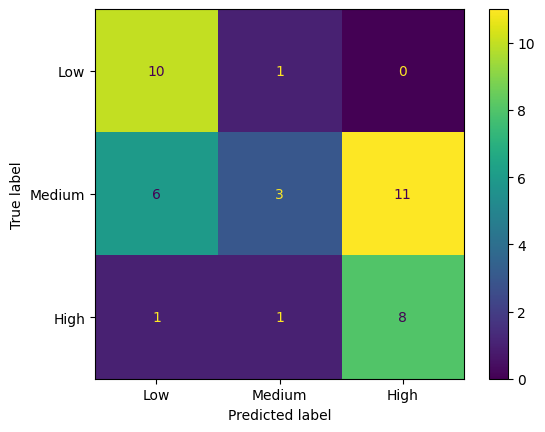

In [78]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(conf_matrix, display_labels = 
 ["Low", "Medium", "High"]) 
disp.plot()

In [80]:
from sklearn.metrics import classification_report

# Calculate and print the classification report
report = classification_report(y_test, life_pred)

print(report)

              precision    recall  f1-score   support

        High       0.42      0.80      0.55        10
         Low       0.59      0.91      0.71        11
      Medium       0.60      0.15      0.24        20

    accuracy                           0.51        41
   macro avg       0.54      0.62      0.50        41
weighted avg       0.55      0.51      0.44        41

